# Convert ITK Image to MultiscaleSpatialImage

ITK Python modules provide a variety of image processing filters and techniques. It can be useful to convert directly from an `itk.Image` to a `MultiscaleSpatialImage` in a Python runtime. The following example demonstrates the `multiscale_spatial_image.itk_image_to_multiscale` conversion method and breaks down the involved steps.

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade --pre multiscale-spatial-image matplotlib itk-io

In [1]:
from multiscale_spatial_image import to_multiscale, itk_image_to_multiscale, Methods
from spatial_image import is_spatial_image, to_spatial_image
import itk
import numpy as np
from urllib.request import urlretrieve
import os

## Load 3D ITK Image

In [2]:
# Download example image
image_name = 'monkey_brain'
filename = f'{image_name}.nrrd'
if not os.path.exists(filename):
    url = 'https://data.kitware.com/api/v1/file/564a5b078d777f7522dbfaa6/download'
    urlretrieve(url, filename)

Convert from `itk.Image` is supported. `itk.imread` can read the formats:

- [BioRad](http://www.bio-rad.com/)
- [BMP](https://en.wikipedia.org/wiki/BMP_file_format)
- [DICOM](http://dicom.nema.org/)
- [DICOM Series](http://dicom.nema.org/)
- [ITK HDF5](https://support.hdfgroup.org/HDF5/)
- [JPEG](https://en.wikipedia.org/wiki/JPEG_File_Interchange_Format)
- [Gipl (Guys Image Processing Lab)](https://www.ncbi.nlm.nih.gov/pubmed/12956259)
- [LSM](http://www.openwetware.org/wiki/Dissecting_LSM_files)
- [MetaImage](https://itk.org/Wiki/ITK/MetaIO/Documentation)
- [MINC 2.0](https://en.wikibooks.org/wiki/MINC/SoftwareDevelopment/MINC2.0_File_Format_Reference)
- [MGH](https://surfer.nmr.mgh.harvard.edu/fswiki/FsTutorial/MghFormat)
- [MRC](http://www.ccpem.ac.uk/mrc_format/mrc_format.php)
- [NifTi](https://nifti.nimh.nih.gov/nifti-1)
- [NRRD](http://teem.sourceforge.net/nrrd/format.html)
- [Portable Network Graphics (PNG)](https://en.wikipedia.org/wiki/Portable_Network_Graphics)
- [Tagged Image File Format (TIFF)](https://en.wikipedia.org/wiki/TIFF)
- [VTK legacy file format for images](http://www.vtk.org/VTK/img/file-formats.pdf)
- [Scanco microCT volume file format](http://www.scanco.ch/en/support/customer-login/faq-customers/faq-customers-import-export.html)
- [Varian FDF](https://github.com/InsightSoftwareConsortium/ITKIOFDF)

In [3]:
image = itk.imread(filename)
print(image)

Image (0000018557332E20)
  RTTI typeinfo:   class itk::Image<short,3>
  Reference Count: 1
  Modified Time: 428
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 237
  UpdateMTime: 427
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [300, 350, 250]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [300, 350, 250]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [300, 350, 250]
  Spacing: [0.2734, 0.2734, 0.2734]
  Origin: [-6.835, -6.835, -6.835]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.2734 0 0
0 0.2734 0
0 0 0.2734

  PointToIndexMatrix: 
3.65764 0 0
0 3.65764 0
0 0 3.65764

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0000018556FB17F0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int6

## Generate Multiscale Image With `itk_image_to_multiscale`

In [4]:
axis_units = {dim: "millimeters" for dim in ("x", "y", "z")}
method = Methods.ITK_GAUSSIAN
scale_factors = [4, 2]  # isotropic scale factors
name = "monkey_brain"

itk.auto_progress(0)
multiscale_image = itk_image_to_multiscale(
    image,
    scale_factors=scale_factors,
    anatomical_axes=True,
    axis_units=axis_units,
    method=method,
    name=name,
)

# Result is multiscale image with three levels
print(multiscale_image)

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:       (x: 300, y: 350, z: 250)
│       Coordinates:
│         * x             (x) float64 -6.835 -6.562 -6.288 -6.015 ... 74.36 74.64 74.91
│         * y             (y) float64 -6.835 -6.562 -6.288 -6.015 ... 88.03 88.31 88.58
│         * z             (z) float64 -6.835 -6.562 -6.288 -6.015 ... 60.69 60.97 61.24
│       Data variables:
│           monkey_brain  (z, y, x) int16 dask.array<chunksize=(64, 64, 64), meta=np.ndarray>
│       Attributes:
│           direction:            [[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]
│           ITK_InputFilterName:  NrrdImageIO
│           NRRD_kinds[0]:        domain
│           NRRD_kinds[1]:        domain
│           NRRD_kinds[2]:        domain
│           NRRD_space:           left-posterior-superior
├── DataTree('scale1')
│       Dimensions:       (z: 62, y: 87, x: 75)
│       Coordinates:
│         * z             (z) float64 -6.425 -5.331 -4.238 -3.144 ... 58.1 59.19 

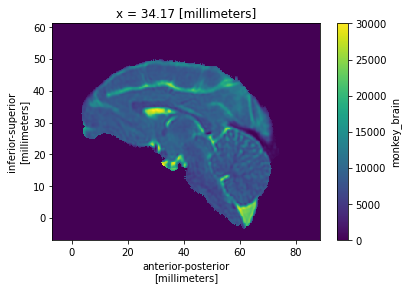

In [5]:
# Visualize with xarray/matplotlib
multiscale_image['scale0'].ds.monkey_brain.isel(x=150).plot.imshow()

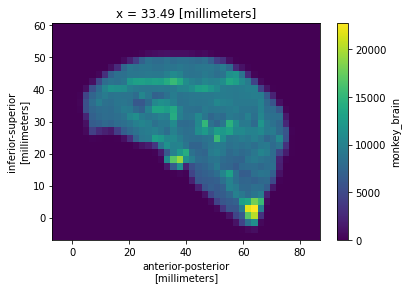

In [6]:
# Visualize with xarray/matplotlib
multiscale_image['scale2'].ds.monkey_brain.isel(x=18).plot.imshow()

## Generate Multiscale Image with `to_multiscale`

An `itk.Image` can be first converted to a `SpatialImage` and then to a `MultiscaleSpatialImage`.

In [7]:
image_da = itk.xarray_from_image(image)
image_da.name = image_name
print(image_da)

<xarray.DataArray 'monkey_brain' (z: 250, y: 350, x: 300)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
      

In [8]:
is_spatial_image(image_da)

True

In [9]:
multiscale = to_multiscale(image_da, [2,4])
print(multiscale)

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:       (x: 300, y: 350, z: 250)
│       Coordinates:
│         * x             (x) float64 -6.835 -6.562 -6.288 -6.015 ... 74.36 74.64 74.91
│         * y             (y) float64 -6.835 -6.562 -6.288 -6.015 ... 88.03 88.31 88.58
│         * z             (z) float64 -6.835 -6.562 -6.288 -6.015 ... 60.69 60.97 61.24
│       Data variables:
│           monkey_brain  (z, y, x) int16 dask.array<chunksize=(64, 64, 64), meta=np.ndarray>
│       Attributes:
│           direction:            [[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]
│           ITK_InputFilterName:  NrrdImageIO
│           NRRD_kinds[0]:        domain
│           NRRD_kinds[1]:        domain
│           NRRD_kinds[2]:        domain
│           NRRD_space:           left-posterior-superior
├── DataTree('scale1')
│       Dimensions:       (x: 150, y: 175, z: 125)
│       Coordinates:
│         * x             (x) float64 -6.698 -6.152 -5.605 -5.058 ... 73.68 74

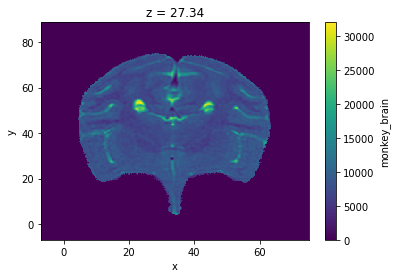

In [10]:
multiscale['scale0'].ds.monkey_brain.isel(z=125).plot.imshow()

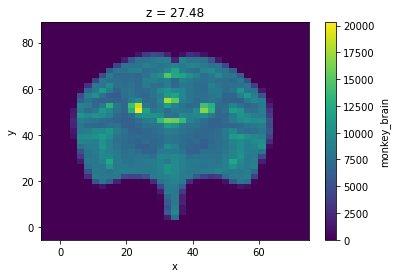

In [11]:
multiscale['scale2'].ds.monkey_brain.isel(z=15).plot.imshow()

We can also orient the volume according an a desired anatomic orientation and provide descriptive axis names. For more information [see this tutorial](https://insightsoftwareconsortium.github.io/GetYourBrainStraight/HCK01_2022_Virtual/Tutorials/MetadataPreservation/MetadataPreservation.html).

In [12]:
itk_so_enums = itk.SpatialOrientationEnums  # shortens next line
dicom_lps = itk_so_enums.ValidCoordinateOrientations_ITK_COORDINATE_ORIENTATION_RAI

oriented_image = itk.orient_image_filter(
    image,
    use_image_direction=True,
    desired_coordinate_orientation=dicom_lps,
)

In [13]:
image_dims = ("x", "y", "z")

scale = {image_dims[i]: s for (i, s) in enumerate(oriented_image.GetSpacing())}
translation = {image_dims[i]: s for (i, s) in enumerate(oriented_image.GetOrigin())}

# DICOM LPS - positive direction is to the left, posterior, superior
axis_names = {"x": "right-left", "y": "anterior-posterior", "z": "inferior-superior"}
axis_units = {dim: "millimeters" for dim in image_dims}
oriented_image_da = to_spatial_image(np.asarray(oriented_image),
                                     scale=scale,
                                     translation=translation,
                                     name=image_name,
                                     axis_names=axis_names,
                                     axis_units=axis_units)

In [14]:
print(oriented_image_da.x)

<xarray.SpatialImage 'x' (x: 300)>
array([-6.835 , -6.5616, -6.2882, ..., 74.3648, 74.6382, 74.9116])
Coordinates:
  * x        (x) float64 -6.835 -6.562 -6.288 -6.015 ... 74.09 74.36 74.64 74.91
Attributes:
    long_name:  right-left
    units:      millimeters


In [15]:
oriented_multiscale = to_multiscale(oriented_image_da, [2,4])

In [16]:
print(oriented_multiscale)

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:       (z: 250, y: 350, x: 300)
│       Coordinates:
│         * z             (z) float64 -6.835 -6.562 -6.288 -6.015 ... 60.69 60.97 61.24
│         * y             (y) float64 -6.835 -6.562 -6.288 -6.015 ... 88.03 88.31 88.58
│         * x             (x) float64 -6.835 -6.562 -6.288 -6.015 ... 74.36 74.64 74.91
│       Data variables:
│           monkey_brain  (z, y, x) int16 dask.array<chunksize=(64, 64, 64), meta=np.ndarray>
├── DataTree('scale1')
│       Dimensions:       (z: 125, y: 175, x: 150)
│       Coordinates:
│         * z             (z) float64 -6.698 -6.152 -5.605 -5.058 ... 60.01 60.56 61.1
│         * y             (y) float64 -6.698 -6.152 -5.605 -5.058 ... 87.35 87.9 88.44
│         * x             (x) float64 -6.698 -6.152 -5.605 -5.058 ... 73.68 74.23 74.77
│       Data variables:
│           monkey_brain  (z, y, x) int16 dask.array<chunksize=(64, 64, 64), meta=np.ndarray>
└── DataTree('scal

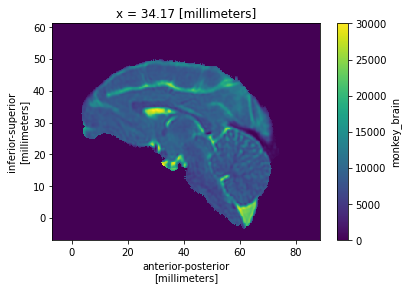

In [17]:
oriented_multiscale['scale0'].ds.monkey_brain.isel(x=150).plot.imshow()

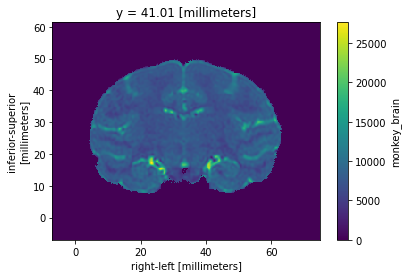

In [18]:
oriented_multiscale['scale0'].ds.monkey_brain.isel(y=175).plot.imshow()

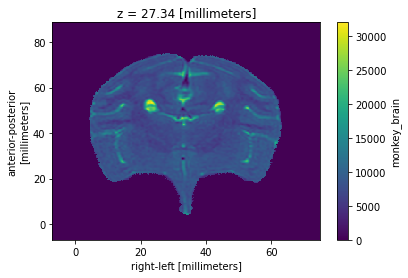

In [19]:
oriented_multiscale['scale0'].ds.monkey_brain.isel(z=125).plot.imshow()